In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
import graphviz

In [74]:
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['MEDV'] = boston.target


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [75]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [76]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train.shape

(404, 13)

In [78]:
reg = DecisionTreeRegressor(max_depth=2)
reg2 = LinearRegression()
reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
y_preds = reg.predict(X_test)
y_preds2 = reg2.predict(X_test)


In [79]:
def regression_report(y_test,y_preds):
    print('r2 score ::::   ',r2_score(y_test,y_preds))
    print('mean absolute error ::::   ',mean_absolute_error(y_test,y_preds))
    print('mean squared error ::::   ',mean_squared_error(y_test,y_preds))
    print('root mean squared error ::::   ',np.sqrt (mean_squared_error(y_test,y_preds)))

In [80]:
print('------------Metrics of Decision Trees---------------')
regression_report(y_test,y_preds)
print('------------Metrics of Linear Regression---------------')
regression_report(y_test,y_preds2)

------------Metrics of Decision Trees---------------
r2 score ::::    0.6192465642927225
mean absolute error ::::    4.441143349759079
mean squared error ::::    31.853711295758327
root mean squared error ::::    5.64390922107703
------------Metrics of Linear Regression---------------
r2 score ::::    0.7789207451814381
mean absolute error ::::    3.1130437468934797
mean squared error ::::    18.495420122448706
root mean squared error ::::    4.300630200615801


In [81]:
params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          'max_depth': [None, 2, 4, 6, 8],
          'max_features':['auto','sqrt','log2',None],
          'max_leaf_nodes': [None, 4, 16, 20, 30],
          'min_impurity_decrease': [0.0, 0.01, 0.08, 0.3],
          'splitter' : ['best','random']}

In [82]:
reg_gcv = GridSearchCV(estimator = reg, param_grid = params, cv = 10, verbose = 2, n_jobs=-1)
reg_gcv.fit(X_train,y_train)
y_preds_gcv = reg_gcv.predict(X_test)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


In [83]:
print('------------Metrics of Decision Trees---------------')
regression_report(y_test,y_preds_gcv)
print('------------Best Parameters---------------')
print(reg_gcv.best_params_)

------------Metrics of Decision Trees---------------
r2 score ::::    0.6447556632104263
mean absolute error ::::    3.3860604728759176
mean squared error ::::    29.719628195943113
root mean squared error ::::    5.451571167649113
------------Best Parameters---------------
{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.0, 'splitter': 'random'}


In [84]:
for importance, name in sorted(zip(reg.feature_importances_,X_train.columns),reverse=True):
    print(name, importance)


LSTAT 0.6307221156288642
RM 0.2826894036411477
CRIM 0.08658848072998811
ZN 0.0
TAX 0.0
RAD 0.0
PTRATIO 0.0
NOX 0.0
INDUS 0.0
DIS 0.0
CHAS 0.0
B 0.0
AGE 0.0


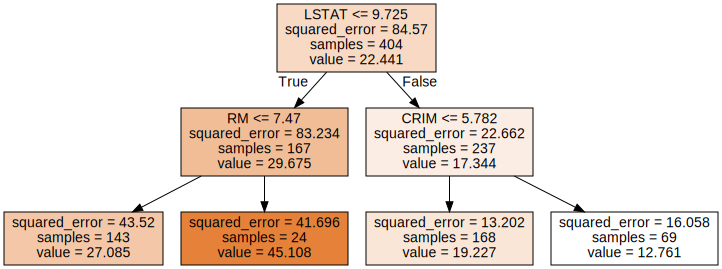

In [85]:
data_tree = tree.export_graphviz(reg,out_file=None, feature_names=boston.feature_names, class_names=boston.target, filled=True)
graph = graphviz.Source(data_tree, format='png')
graph

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


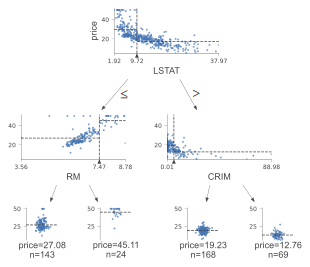

In [86]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

viz = dtreeviz(reg, X_train, y_train, feature_names=boston.feature_names, target_name='price')
viz